In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string 
import string


#import tensorflow as tf

from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
rows_to_skip = [7018]
data =df = pd.read_csv('data.csv', skiprows=rows_to_skip)
data.columns = ["label", "time", "date", "query", "username", "text"]

#### Five top records of data

In [3]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#### Five last records of data

In [4]:
data.tail()

,label,time,date,query,username,text
7012,0,1469643373,Tue Apr 07 06:59:45 PDT 2009,NO_QUERY,JaiJai9772,Okay guys must start getting ready for class. ...
7013,0,1469643486,Tue Apr 07 06:59:46 PDT 2009,NO_QUERY,FANTAZ28,@ashleymancini you have more then one
7014,0,1469644019,Tue Apr 07 06:59:52 PDT 2009,NO_QUERY,absolutjoiz,Very hungry and thirstu after the badminton. A...
7015,0,1469644323,Tue Apr 07 06:59:55 PDT 2009,NO_QUERY,e_wils,"1 word, Excedrin.."
7016,0,1469644758,Tue Apr 07 07:00:01 PDT 2009,NO_QUERY,whoopsie,Today is turning into a frustrating exercise o...


#### Coloumns/features in data

In [5]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

#### Length of data

In [6]:
print('lenght of data is', len(data))

lenght of data is 7017


#### Shape of data

In [7]:
data.shape

(7017, 6)

#### Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     7017 non-null   int64 
 1   time      7017 non-null   int64 
 2   date      7017 non-null   object
 3   query     7017 non-null   object
 4   username  7017 non-null   object
 5   text      7017 non-null   object
dtypes: int64(2), object(4)
memory usage: 329.0+ KB


#### Data types of all coloumns

In [9]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

#### Checking Null values

In [10]:
np.sum(data.isnull().any(axis=1))

0

#### Selecting the text and label coloumn

In [14]:
data=data[['text','label']]

#### Assigning 1 to Positive sentment 4

In [15]:
data['label'][data['label']==4]=1

#### Separating positive and negative tweets

In [16]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

#### taking one fourth data so we can run on our machine easily 

In [17]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

#### Combining positive and negative tweets

In [18]:
data = pd.concat([data_pos, data_neg])

#### Making statement text in lower case

In [19]:
data['text']=data['text'].str.lower()

In [20]:
data['text'].tail()

7012    okay guys must start getting ready for class. ...
7013               @ashleymancini you have more then one 
7014    very hungry and thirstu after the badminton. a...
7015                               1 word, excedrin..    
7016    today is turning into a frustrating exercise o...
Name: text, dtype: object

#### Cleaning and removing Stop words of english

In [21]:
stopwords_list = stopwords.words('english')

In [22]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [23]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    upset can't update facebook texting it... migh...
1    @kenichan dived many times ball. managed save ...
2                     whole body feels itchy like fire
3    @nationwideclass no, behaving all. i'm mad. he...
4                                 @kwesidei whole crew
Name: text, dtype: object

#### Cleaning and removing punctuations 

In [24]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [25]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

7012    okay guys must start getting ready class tuesd...
7013                                    ashleymancini one
7014    hungry thirstu badminton cant eat yet coz im f...
7015                                      1 word excedrin
7016    today turning frustrating exercise quotignore ...
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [26]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [27]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

7012    okay guys must start geting ready clas tuesday...
7013                                    ashleymancini one
7014    hungry thirstu badminton cant eat yet coz im f...
7015                                      1 word excedrin
7016    today turning frustrating exercise quotignore ...
Name: text, dtype: object

#### Cleaning and removing email

In [28]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [29]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

7012    okay guys must start geting ready clas tuesday...
7013                                    ashleymancini one
7014    hungry thirstu badminton cant eat yet coz im f...
7015                                      1 word excedrin
7016    today turning frustrating exercise quotignore ...
Name: text, dtype: object

#### Cleaning and removing URL's

In [30]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [31]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

7012    okay guys must start geting ready clas tuesday...
7013                                    ashleymancini one
7014    hungry thirstu badminton cant eat yet coz im f...
7015                                      1 word excedrin
7016    today turning frustrating exercise quotignore ...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [32]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [33]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

7012    okay guys must start geting ready clas tuesday...
7013                                    ashleymancini one
7014    hungry thirstu badminton cant eat yet coz im f...
7015                                        word excedrin
7016    today turning frustrating exercise quotignore ...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [34]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [35]:
data['text'].head()

0    [upset, cant, update, facebok, texting, it, mi...
1    [kenichan, dived, many, times, bal, managed, s...
2               [whole, body, fels, itchy, like, fire]
3    [nationwideclas, no, behaving, al, im, mad, he...
4                              [kwesidei, whole, crew]
Name: text, dtype: object

#### Applying Stemming

In [36]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [37]:
data['text'].head()

0    [upset, cant, update, facebok, texting, it, mi...
1    [kenichan, dived, many, times, bal, managed, s...
2               [whole, body, fels, itchy, like, fire]
3    [nationwideclas, no, behaving, al, im, mad, he...
4                              [kwesidei, whole, crew]
Name: text, dtype: object

#### Applying Lemmatizer

In [80]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\THINK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [82]:
data['text'].head()

0    [upset, cant, update, facebok, texting, it, mi...
1    [kenichan, dived, many, times, bal, managed, s...
2               [whole, body, fels, itchy, like, fire]
3    [nationwideclas, no, behaving, al, im, mad, he...
4                              [kwesidei, whole, crew]
Name: text, dtype: object

####  Separating input feature and label

In [83]:
X=data.text
y=data.label

#### Preparing the input features for training 
- We converting the text words into arrays form. 
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets. 

In [84]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [85]:
from tensorflow.keras.preprocessing import sequence


In [86]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [87]:
sequences_matrix.shape

(7017, 500)

#### Separating the 70% data for training data and 30% for testing data

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [89]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

# Model compilation

In [90]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop


In [91]:
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [92]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
56/56 [==============================] - 26s 387ms/step - loss: 0.0729 - accuracy: 0.9925 - val_loss: 1.5426e-04 - val_accuracy: 1.0000
Epoch 2/6
56/56 [==============================] - 24s 431ms/step - loss: 1.2785e-04 - accuracy: 1.0000 - val_loss: 2.7683e-05 - val_accuracy: 1.0000
Epoch 3/6
56/56 [==============================] - 46s 831ms/step - loss: 4.0488e-05 - accuracy: 1.0000 - val_loss: 1.1912e-05 - val_accuracy: 1.0000
Epoch 4/6
56/56 [==============================] - 65s 1s/step - loss: 2.2672e-05 - accuracy: 1.0000 - val_loss: 7.1862e-06 - val_accuracy: 1.0000
Epoch 5/6
56/56 [==============================] - 32s 573ms/step - loss: 1.6210e-05 - accuracy: 1.0000 - val_loss: 4.9558e-06 - val_accuracy: 1.0000
Epoch 6/6
56/56 [==============================] - 65s 1s/step - loss: 1.2638e-05 - accuracy: 1.0000 - val_loss: 3.6981e-06 - val_accuracy: 1.0000
Training finished !!


<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

#### Testing the Trained model on test data
- Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [93]:
accr1 = model.evaluate(X_test,Y_test) 

66/66 [==============================] - 6s 88ms/step - loss: 3.7023e-06 - accuracy: 1.0000


#### Accuracy
- Accuracy is the number of correctly classify tweets from all the tweets of positive and negative. 
- For example, if the trained model classify the 70 tweets correct and 30 tweets wrong from total of 100 tweets then the accuracy score will be 70%. 
- Accuracy= Total number of correct predictions/Total number of predictions

In [94]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 1.00


#### Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
- As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [95]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

66/66 [==============================] - 6s 87ms/step


#### Confusion matrix
- These are the evaluation measures to evaluate the performance of the model.
- Dark blue boxes are the correct predictions with the trained model and sky blue boxes shows the wrong predictions.
- 4610 tweets correctly predicted as negative sentiments. 1399 tweets predicted positive sentiments but that were actually negative sentiments.
- 4247 tweets correctly predicted as postive sentiments. 1744 tweets predicted negative sentiments but that were actually positive sentiments.

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])



confusion matrix


[[2 2]
 [1 2]]




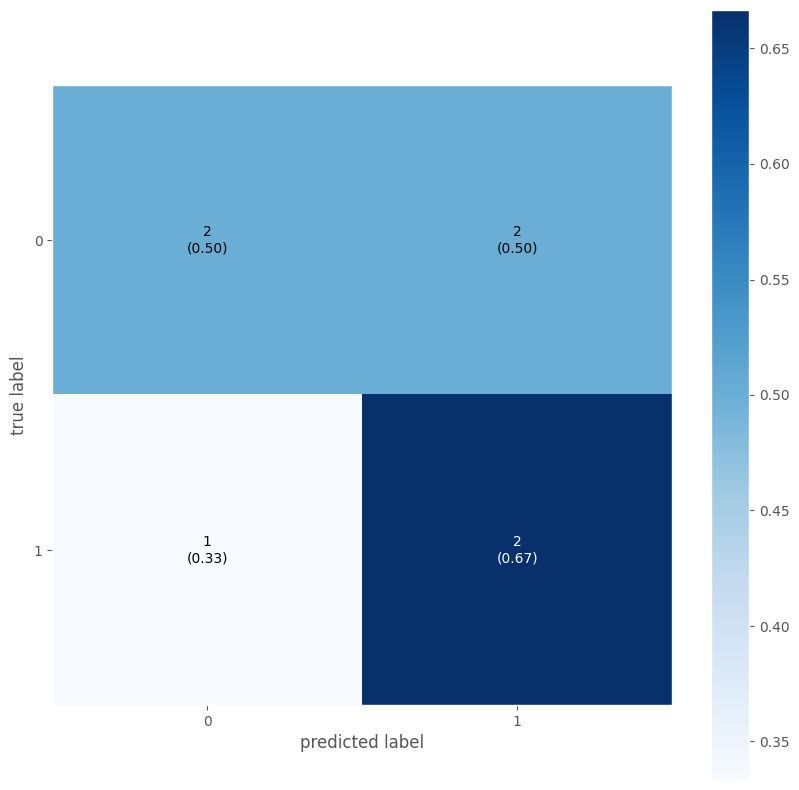

In [157]:


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_true, y_score)



#CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig,ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# ROC CURVE
- ROC curve show the performance of the model as well. 
- We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct
- ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

In [144]:
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Assuming y_true and y_pred are your true and predicted labels
#y_true = [0, 1, 1, 0, 1, 0, 1]
#y_pred = [0, 1, 1, 1, 0, 0, 1]

# Example calculation of precision, recall, and F1-score
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.75
Recall: 0.75
F1-score: 0.75


In [145]:
print("Shape of Y_test:", Y_test.shape)
import numpy as np

y_pred = np.array(y_pred)
print("Shape of y_pred:", y_pred.shape)


Shape of Y_test: (2106,)
Shape of y_pred: (7,)


In [146]:
print("Y_test shape:", Y_test.shape)
print("y_pred shape:", y_pred.shape)
 
y_pred

Y_test shape: (2106,)
y_pred shape: (7,)


array([0, 1, 1, 1, 0, 0, 1])

In [154]:
y_pred

array([0, 1, 1, 1, 0, 0, 1])

In [85]:
y_score

[0, 1, 1, 1, 0, 0, 1]

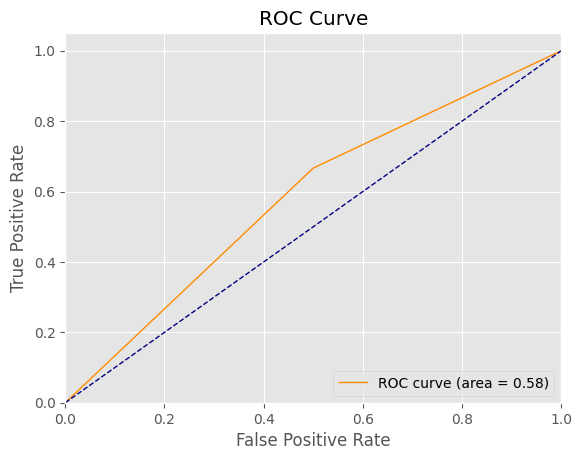

In [167]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [158]:
num_epochs = 7
batch_size=7016

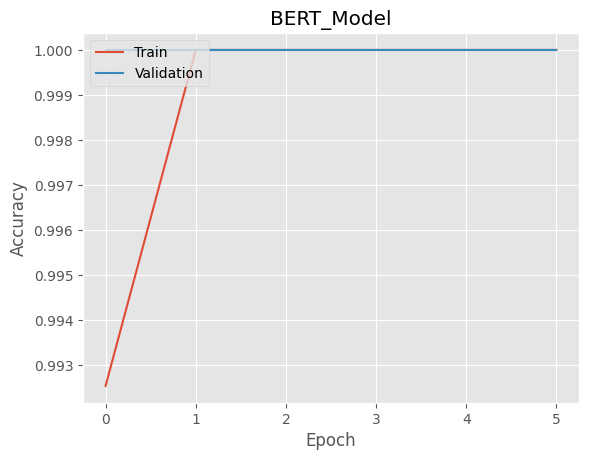

In [163]:

fpr, tpr, thresholds = roc_curve([0, 1, 0, 1, 0, 1, 0]
, [0, 1, 1, 1, 0, 0, 1])
roc_auc = auc(fpr, tpr)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('BERT_Model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')